In [1]:
with open('examples/0011.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)

# -1 -2 0
# off or off |00> not |11>
# 1 -2 0
# off or on |01> not |10>
"""
h q[0];
h q[1];
z q[0];
x q[0];
cx q[1],q[0];
"""

p cnf 2 3
-1 -2 0
1 -2 0
-1 2 0



'\nh q[0];\nh q[1];\nz q[0];\nx q[0];\ncx q[1],q[0];\n'

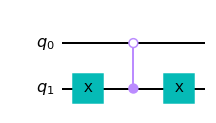

In [2]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/0011.dimacs')
oracle.draw('mpl')

In [3]:
def display_unitary(qc, prefix=""):
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    qc = qc.copy()
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))
    
display_unitary(oracle, "U_\\text{oracle}=")

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: AerSimulator: circuit with instructions {"instructions": {save_unitary, gate}, "gates": {x, cz_o0}} is not compatible with any available simulation methods


QiskitError: 'You have to select a circuit or schedule when there is more than one available'

In [ ]:
from qiskit import QuantumCircuit
init = QuantumCircuit(2)
init.h([0,1])

from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)
qc = init.compose(grover_operator)
qc.measure_all()
qc.decompose().draw('mpl')

In [ ]:
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

oracle = QuantumCircuit(2, name='oracle')
oracle.h([0,1])
oracle.z(0)
oracle.x(0)
oracle.cx(1, 0)
oracle.to_gate()
# oracle.to_instruction()
# display(oracle.draw('mpl'))

qc = QuantumCircuit(2,2)
qc.h([0,1])
qc.append(oracle, [0,1])
# display(qc.draw('mpl'))

reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
# reflection.to_instruction()
# display(reflection.draw('mpl'))

qc.append(reflection, [0,1])
qc.measure([0,1], [0,1])
# display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

In [ ]:
# https://qiskit.org/documentation/stubs/qiskit.providers.aer.AerSimulator.html#qiskit.providers.aer.AerSimulator
from qiskit.providers.aer import AerSimulator
from qiskit import execute
from qiskit.visualization import plot_histogram
#aer_sim = AerSimulator(method='statevector')
#result = execute(qc, backend=aer_sim).result()
#sv = result.get_statevector()
# Result ERROR: No statevector for experiment "None"

sim = AerSimulator()
result = execute(qc, sim).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
display_unitary(oracle, "U_\\text{oracle}2=")